In [4]:
# %reset

1. Using the same housing data (Asssignment4_Data.xlsx), construct a decision tree classifier. You can use the implementation available on Sci-Kit Learn. Perform the following experiments and briefly (2-4 sentences) answer the questions. 

In [467]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from collections import Counter

In [18]:
xls = pd.ExcelFile('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df_train = pd.read_excel(xls, sheet_name='Train')
df_test = pd.read_excel(xls, 'Test')
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [449]:
# df_train.describe().head(3)

In [448]:
X_train = df_train.to_numpy()[:,1:9]
Y_train = df_train.to_numpy()[:,9]

X_test = df_test.to_numpy()[:,1:9]
Y_test = df_test.to_numpy()[:,9]

## problem 1

In [307]:
# probability for continuous variables
def prob_conts_feature(feature, x):
#     df_col = np.array(df_train.columns)
#     i = np.where(df_col==feature)
    mu = df_train.describe()[feature][1]
    sigma = df_train.describe()[feature][2]
    func = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mu)/sigma)**2 )
    return func 

In [446]:
d = {df_col[0]: np.arange(1,21,1), 
     df_col[1]: prob_conts_feature(df_col[1], df_train[df_col[1]]),
     df_col[3]: prob_conts_feature(df_col[3], df_train[df_col[3]]),
     df_col[4]: prob_conts_feature(df_col[4], df_train[df_col[4]]),
     df_col[8]: prob_conts_feature(df_col[8], df_train[df_col[8]]),
     }
prob_cont = pd.DataFrame(d)
# prob_cont 

In [377]:
# probabilities for other discrete features
bath = pd.DataFrame({'values':[1,1.5,2.5],
                     'A':[5/7,1/7,1/7], 
                     'H':[6/7,1/7,0], 
                     'C':[4/6,1/6,1/6]
                    }
                   )

gar = pd.DataFrame({'values': [0,1,1.5,2],
                    'A':[1/7,3/7,1/7,2/7],
                    'H':[2/7,2/7,1/7,2/7],
                    'C':[0/6,4/6,0/6,2/6],
                   }
                  )

room = pd.DataFrame({'values': [5,6,7,8,9,10],
                    'A':[1/7,2/7,2/7,1/7,1/7,0/7],
                    'H':[1/7,4/7,2/7,0,0,0],
                    'C':[0,4/6,1/6,0,0,1/6],
                   }
                  )

bed = pd.DataFrame({'values': [2,3,4,5],
                    'A':[1/7,3/7,2/7,1/7],
                    'H':[1/7,5/7,1/7,0],
                    'C':[0,5/6,0,1/6],
                   }
                  )

In [386]:
def prob_bath(letter, val):
    return bath[letter][bath.loc[bath['values'] == val].index[0]]

def prob_gar(letter, val):
    return gar[letter][gar.loc[gar['values'] == val].index[0]]

def prob_room(letter, val):
    return room[letter][room.loc[room['values'] == val].index[0]]

def prob_bed(letter, val):
    return bed[letter][bed.loc[bed['values'] == val].index[0]]

In [401]:
def prob_target(target,letter):
    return prob_bath(letter,target[1]) * prob_gar(letter, target[4]) * prob_room(letter, target[5]
    ) * prob_bed(letter, target[6]) * prob_conts_feature(df_col[1], target[0]
    ) * prob_conts_feature(df_col[3],target[2]) * prob_conts_feature(df_col[4],target[3]
    ) * prob_conts_feature(df_col[8],target[7])

In [445]:
def prediction(X_test):
    output = []
    for i in range(len(X_test)):
        mydict = {'Apartment':prob_target(X_test[i], "A"), "House": prob_target(X_test[i], "H"), "Condo": prob_target(X_test[i], "C")}
        keys = [k for k, v in mydict.items() if v == max(mydict.values())]
        output.append(keys) 
    output = (np.array(output)).flatten()
    return output
print(f'prediction:',prediction(X_test))
print(f'true values:',Y_test)

prediction: ['Condo' 'Apartment' 'House' 'Apartment' 'Condo']
true values: ['Apartment' 'House' 'House' 'Apartment' 'Apartment']


## problem 2

### 2.1

In [451]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

In [86]:
model.score(X_train, Y_train)

1.0

In [222]:
print(model.predict(X_test),"\n", Y_test)

['Condo' 'Condo' 'Condo' 'Apartment' 'Apartment'] 
 ['Apartment' 'House' 'House' 'Apartment' 'Apartment']


In [225]:
model.score(X_test, Y_test)

0.4

1. Use the default parameters.  
    1. What is the accuracy on the training set?  
    > 100%
    1. What is the accuracy on the test set? 
    > 40%

### 2.2

the best value occurs for the maximum depth = 2
test_score= [0.4, 0.8, 0.4, 0.4, 0.4] ...


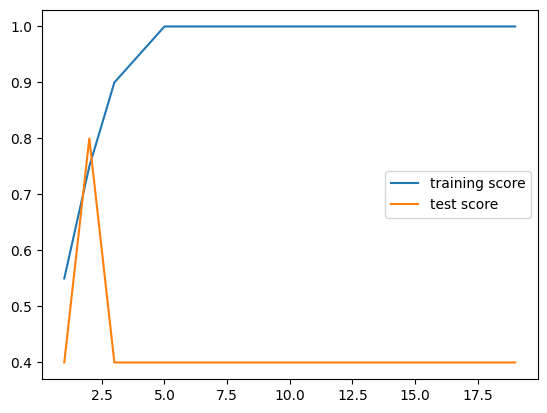

In [230]:
tr_score = []
test_score = []
x = np.arange(1,20)
for i in x:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    tr_score.append(round(model.score(X_train,Y_train),4))
    test_score.append(round(model.score(X_test, Y_test),4))    
print("the best value occurs for the maximum depth =",test_score.index(max(test_score))+1)
print("test_score=",test_score[:5],"...")

plt.plot(x,tr_score, label='training score')
plt.plot(x,test_score, label='test score')
plt.legend()
# print(tr_score)
# print(max(tr_score))
plt.show()

2. What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.
> We tried different depths and found that the optimization improves and fall for larger values of the depth. The best value occurs for the maximum depth = 2. That's the point where underfitting and overfitting are balanced.

### 2.3

3. Why does restricting the depth have such a strong effect on the classifier performance?  
> Decision tree classifiers always overfit; because they just memorize the training data and fits perfectly quickly as we saw in the plots. But the test data accuracy reaches maximum only for a depth of 2. That's why restricting the depth manually helps the model to remain on a point where it neither underfits nor overfits extremely.

### 2.4

4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following  example:

In [454]:
# df_test

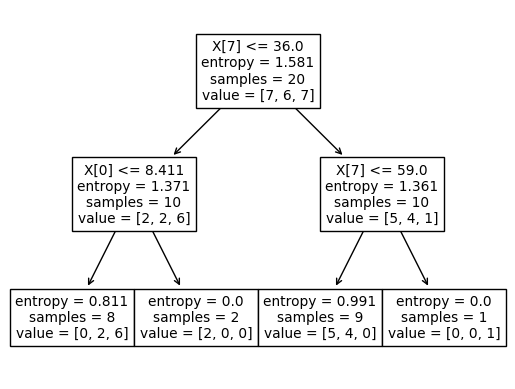

In [457]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
model = model.fit(X_train, Y_train)
tree.plot_tree(model)
plt.show()

>We changed the criterion to entropy and set max depth to 2. In the given example, age of home, X[7]=23 < 59. So we follow the branch on the right side. It is divided into two leaves, with 5 apartments, 4 condos and and 1 house examples. So there is 50%, 40%, and 10% probability of the example representing an apartment, condo, or house, respectively.

## problem 3

In [462]:
def find_majority(votes):
    vote_count = Counter(votes)
    top_two = vote_count.most_common(2)
    if len(top_two)>1 and top_two[0][1] == top_two[1][1]:
        # It is a tie
        # choosing an index randomly
        x = np.random.randint(0,2)
        return top_two[x][0]
    else:
        # no tie, choosing the max
        return top_two[0][0]

In [463]:
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

# def majority(l):
#     try:
#         return mode(l)
#     except StatisticsError:
#         return 0

#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = np.array([])
         
        #Loop through each training Data
        for i in range(len(x_train)):
            distances = eucledian(x_train[i], item) 
                #Calculating the distance
            point_dist = np.append(point_dist, distances) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting 
        op_labels.append(find_majority(labels))
 
    return op_labels

In [464]:
#Loading the Data
xls = pd.ExcelFile('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df_train = pd.read_excel(xls, sheet_name='Train')
df_test = pd.read_excel(xls, 'Test')

#normalizing data
X_train = df_train.to_numpy()[:,1:9]
Y_train = df_train.to_numpy()[:,9]

X_test = df_test.to_numpy()[:,1:9]
Y_test = df_test.to_numpy()[:,9]

for data in (X_train, X_test):
    for i in range(8):
        data[:,i]/=max(data[:,i])

In [468]:
# Applying the function 
print("The true values:\n  >",Y_test)

for k in range(1,6):
    Y_pred = predict(X_train, Y_train, X_test, k)
    print(k,">",Y_pred)

The true values:
  > ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
1 > ['Condo', 'Condo', 'Apartment', 'Condo', 'Condo']
2 > ['Apartment', 'Condo', 'Apartment', 'Apartment', 'Condo']
3 > ['Condo', 'Apartment', 'Apartment', 'Apartment', 'Apartment']
4 > ['Condo', 'Apartment', 'Apartment', 'Apartment', 'Apartment']
5 > ['Condo', 'Apartment', 'Condo', 'Apartment', 'Apartment']


In [470]:
def accuracy(true,pred):
    n = 0
    if len(true)==len(pred):
        n = len(true)
    s=0
    for i in range(n):
        if true[i]==pred[i]:
            s+=1
    return s/n

[0.  0.4 0.4 0.4 0.6 0.4 0.6 0.6 0.6]


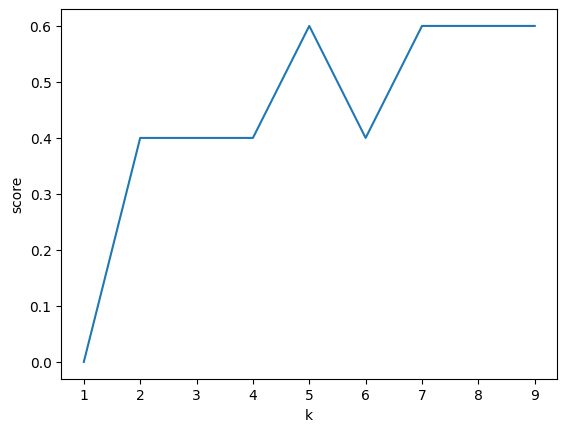

In [478]:
score = np.array([])
for k in range(1,10):
    Y_pred = predict(X_train, Y_train, X_test, k)
    score = np.append(score,accuracy(Y_test,Y_pred))
    
print(score)
# plt.plot([1,2,3,4,5], score)
plt.plot(np.arange(1,10,1), score)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

> Comments: euclidian distance was chosen after normalizing the data. We can see that accuracy fluctuates as we change k from 1 to 10 (I took more than 5, as it shows us better picture). 